In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [2]:
df = pd.read_csv("payment_customer_data.csv")
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8250.0,4.124500e+03,2.381714e+03,0.0,2062.25,4.124500e+03,6.186750e+03,8.249000e+03
id,8250.0,5.782173e+07,1.822724e+06,54982353.0,54990497.00,5.898905e+07,5.899655e+07,5.900624e+07
OVD_t1,8250.0,2.490909e-01,1.250197e+00,0.0,0.00,0.000000e+00,0.000000e+00,3.400000e+01
OVD_t2,8250.0,1.271515e-01,8.600464e-01,0.0,0.00,0.000000e+00,0.000000e+00,3.400000e+01
OVD_t3,8250.0,3.692121e-01,2.900320e+00,0.0,0.00,0.000000e+00,0.000000e+00,3.500000e+01
OVD_sum,8250.0,1.876817e+02,1.804233e+03,0.0,0.00,0.000000e+00,0.000000e+00,3.150000e+04
pay_normal,8250.0,1.452667e+01,1.205363e+01,0.0,4.00,1.100000e+01,2.500000e+01,3.600000e+01
prod_code,8250.0,8.232000e+00,3.533055e+00,0.0,6.00,1.000000e+01,1.000000e+01,2.700000e+01
prod_limit,2132.0,8.578970e+04,7.434583e+04,1.1,37400.00,6.820000e+04,1.122000e+05,6.600000e+05
new_balance,8250.0,1.054042e+05,1.887704e+06,-40303.2,0.00,0.000000e+00,2.494800e+04,1.632120e+08


In [3]:
def preprocess(df):
    df.drop_duplicates()
    df.dropna(inplace=True)
    
    df['report_date'] = pd.to_datetime(df['report_date'],format='mixed')
    df['update_date'] = pd.to_datetime(df['update_date'],format='mixed')
    df['report_update_diff'] = (df['update_date'] - df['report_date']).dt.days
    
    df.drop('update_date', axis=1, inplace=True)
    df.drop('report_date', axis=1, inplace=True)

    
    
    return df

In [4]:
df1 = preprocess(df)
X = df1.drop(['label'], axis=1)
y = df1['label']

In [5]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

print("X_train", X_train.shape, "y_train", y_train.shape)
print("X_val",X_val.shape, "y_val", y_val.shape)
print("X_train_val",X_train_val.shape, "y_train_val", y_train_val.shape)
print("X_test",X_test.shape, "y_test",y_test.shape)
    

X_train (1085, 23) y_train (1085,)
X_val (272, 23) y_val (272,)
X_train_val (1357, 23) y_train_val (1357,)
X_test (340, 23) y_test (340,)


# A single layer model
Perceptron is a single layer neural network, meaning it's a linear model.

In [6]:
C_range = np.logspace(np.log10(1e-10), np.log10(1e10), num=3)


In [7]:
def sp(C_range):
    best_p = None
    best_acc = 0
    bestC = 0

    for C in C_range:
        p = Perceptron(max_iter=100, alpha=C, penalty='l1')
        p.fit(X_train, y_train)
        acc = p.score(X_val, y_val)
        print(f"C: {C}, validation accuracy: {acc}")
        if acc > best_acc:
            best_acc = acc
            best_p = p
            best_C = C
                
    print(f"\nbest C: {best_C}, best validation accuracy:{best_acc}\n")

    y_pred = p.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    
    print(f"Test accuracy:{test_acc}\n")
    print(classification_report(y_test, y_pred, zero_division=0))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='.1f')


    

C: 1e-10, validation accuracy: 0.8933823529411765
C: 1.0, validation accuracy: 0.8933823529411765
C: 10000000000.0, validation accuracy: 0.8933823529411765

best C: 1e-10, best validation accuracy:0.8933823529411765

Test accuracy:0.8823529411764706

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       300
           1       0.00      0.00      0.00        40

    accuracy                           0.88       340
   macro avg       0.44      0.50      0.47       340
weighted avg       0.78      0.88      0.83       340



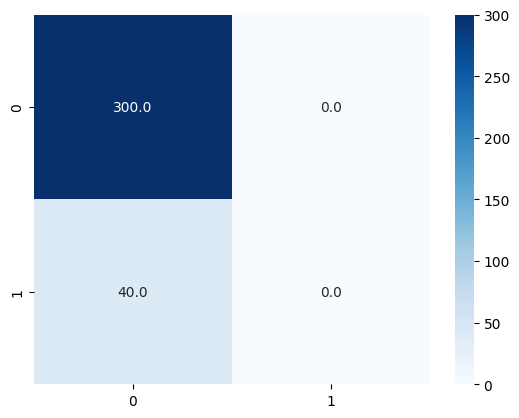

In [8]:
sp(C_range)

# Multilayer perceptron

In [12]:
activations = ['relu', 'logistic','tanh']
hidden_layer_sizes = ([len(X),len(X)],[len(X),len(X),len(X)], [len(X),len(X),len(X),len(X)])

In [13]:
def mlps(hidden_layer_sizes, activations):
    best_mlp = None
    best_sizes = [0,0,0]
    best_act = ""
    best_accuracy = 0
    
    for sizes in hidden_layer_sizes:
        for activation in activations:
            mlp = MLPClassifier(max_iter=100, solver='sgd', random_state=1,hidden_layer_sizes=sizes, activation=activation)
            mlp.fit(X_train, y_train)
            y_predict = mlp.predict(X_val)
            accuracy = accuracy_score(y_val, y_predict)
            print(f"Activation: {activation}, Hidden layers: {sizes}, Validation accuracy: {accuracy}\n")
            if (accuracy > best_accuracy):
                best_accuracy = accuracy
                best_mlp = mlp
                best_sizes = sizes
                best_act = activation
   
    print(f"best activation: {best_act},  best hidden layers sizes: {best_sizes}, best validation accuracy:{best_accuracy}\n")

    y_pred = best_mlp.predict(X_test)
    
    print(f"Test accuracy:{accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='.1f')


Activation: relu, Hidden layers: [1697, 1697], Validation accuracy: 0.8933823529411765

Activation: logistic, Hidden layers: [1697, 1697], Validation accuracy: 0.8933823529411765

Activation: tanh, Hidden layers: [1697, 1697], Validation accuracy: 0.8933823529411765

Activation: relu, Hidden layers: [1697, 1697, 1697], Validation accuracy: 0.8933823529411765

Activation: logistic, Hidden layers: [1697, 1697, 1697], Validation accuracy: 0.8933823529411765

Activation: tanh, Hidden layers: [1697, 1697, 1697], Validation accuracy: 0.8933823529411765

Activation: relu, Hidden layers: [1697, 1697, 1697, 1697], Validation accuracy: 0.8897058823529411

Activation: logistic, Hidden layers: [1697, 1697, 1697, 1697], Validation accuracy: 0.8933823529411765

Activation: tanh, Hidden layers: [1697, 1697, 1697, 1697], Validation accuracy: 0.8933823529411765

best activation: relu,  best hidden layers sizes: [1697, 1697], best validation accuracy:0.8933823529411765

Test accuracy:0.8823529411764706


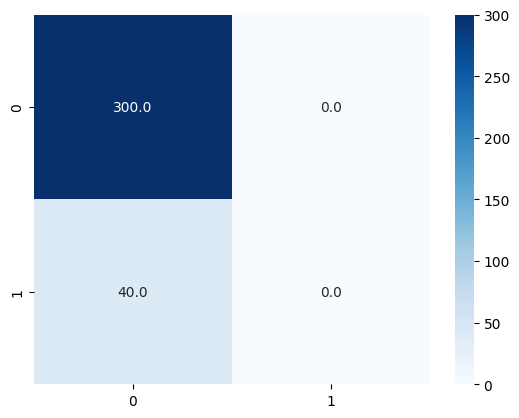

In [14]:
mlps(hidden_layer_sizes, activations)